In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] =  1.6

In [4]:
EVAL_DIR = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/eval'

In [5]:
rr_df =  pd.read_csv(os.path.join(EVAL_DIR, 'rr_queries_od_model_sbert_2020-03-18_16-19.csv'))

In [13]:
rr_df.describe()

,qid,original,degree_2,degree_3,degree_4,degree_4_split,degree_8,degree_8_split,original_irrelevant
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,153.500000,0.550023,0.177606,0.128559,0.108957,0.116654,0.069995,0.087153,0.064855
std,89.056162,0.376053,0.094887,0.076347,0.074900,0.084189,0.042772,0.070827,0.036044
min,0.000000,0.026316,0.042626,0.032904,0.032505,0.030078,0.027379,0.031087,0.032734
25%,76.750000,0.200000,0.102099,0.072496,0.058413,0.063242,0.044667,0.049616,0.040083
50%,153.500000,0.500000,0.156073,0.110017,0.085762,0.086304,0.056285,0.062147,0.048216
75%,230.250000,1.000000,0.225254,0.167593,0.125479,0.133581,0.080638,0.090919,0.076065
max,307.000000,1.000000,0.473958,0.437500,0.453125,0.481061,0.324405,0.423872,0.207395


In [7]:
def rename_types_dict(name):
    if name == 'original':
        return 'rel_original'
    elif name == 'original_irrelevant':
        return 'irrel_original'    
    m = re.match("(degree_)([\d]+)", name)
    if not m:
        raise Exception("Unknown column name '" + name + "'")
    number = m.group(2)
    if name.endswith('split'):
        return 'rel_degree_' + str(number) + '_split'
    return 'rel_degree_' + str(number)

In [8]:
def make_mrr_boxplots(data, cols, id_vars=['qid'], ylabel='MRR', xlabel='document type', title='',
                      figsize=(8,8)):
    
    fig = plt.figure(figsize=figsize)
    
    data_melted = pd.melt(data, id_vars=['qid'], value_vars=cols)
    
    ax = sns.boxplot(x="variable", y="value", data=data_melted, palette="colorblind", showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(plt.xticks()[0], [rename_types_dict(x) for x in cols])


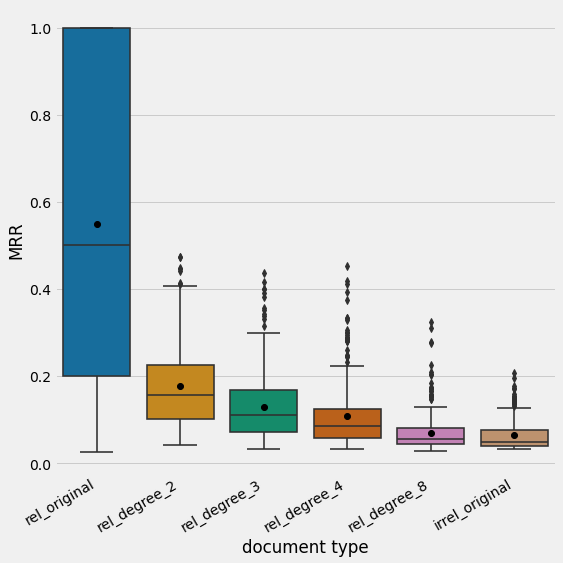

In [11]:
cols = ['original'] + \
       [x for x in rr_df.columns if x.startswith('degree_') and not x.endswith('split')] + \
       ['original_irrelevant']
make_mrr_boxplots(rr_df, cols)

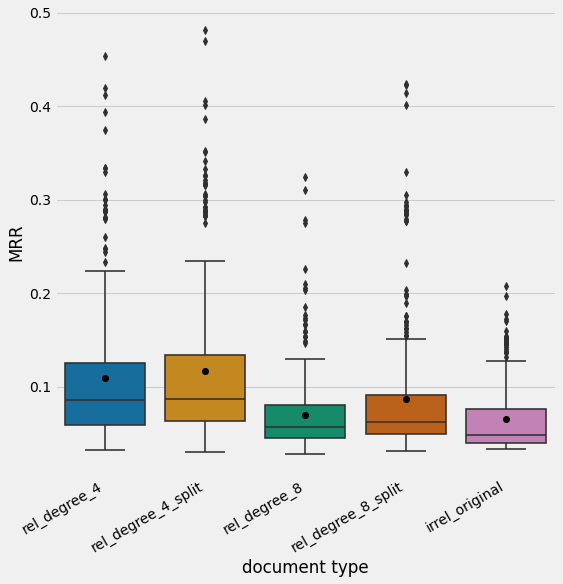

In [12]:
cols =  \
       ['degree_4', 'degree_4_split'] +\
       ['degree_8', 'degree_8_split'] + \
       ['original_irrelevant']


make_mrr_boxplots(rr_df, cols)